In [122]:
import pandas as pd

# Read dataset
dataset = pd.read_excel('netflix_titles.xlsx', sheet_name = None)

# List of keys
sheets = list(dataset.keys())

# Same each sheet as a dataframe
title = pd.DataFrame(dataset[sheets[0]])
director = pd.DataFrame(dataset[sheets[1]])
country = pd.DataFrame(dataset[sheets[2]])
cast = pd.DataFrame(dataset[sheets[3]])
category = pd.DataFrame(dataset[sheets[4]])

In [123]:
title.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0


In [124]:
director.head()

,director,show_id
0,Richard Finn,81145628
1,Fernando Lebrija,80125979
2,Gabe Ibáñez,70304989
3,Rodrigo Toro,80164077
4,Henrik Ruben Genz,70304990


In [125]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_minutes  4267 non-null   object 
 1   duration_seasons  1971 non-null   object 
 2   type              6235 non-null   object 
 3   title             6235 non-null   object 
 4   date_added        6223 non-null   object 
 5   release_year      6234 non-null   float64
 6   rating            6223 non-null   object 
 7   description       6233 non-null   object 
 8   show_id           6232 non-null   float64
dtypes: float64(2), object(7)
memory usage: 438.6+ KB


In [126]:
title.type.value_counts()

Movie      4265
TV Show    1969
1944          1
Name: type, dtype: int64

In [127]:
len(title.title.unique()), len(title.show_id.unique())

(6174, 6233)

In [128]:
director[director.duplicated()]

,director,show_id
4485,Miguel Cohan,81018067


In [129]:
director[director.director=='Miguel Cohan']

,director,show_id
1950,Miguel Cohan,81018067
4485,Miguel Cohan,81018067


In [130]:
director.drop_duplicates(inplace = True)
director.shape

(4851, 2)

In [131]:
len(director['show_id'].unique())

4265

In [132]:
# Grouping directors for each show_id
director_edit = director.groupby('show_id')['director'].agg(lambda X: ', '.join(X)).reset_index()
director_edit

,show_id,director
0,247747,Manmohan Desai
1,269880,Michael Bay
2,281550,Luis Valdez
3,284890,Rajkumar Santoshi
4,292118,Mike Judge
...,...,...
4260,81221913,Remy Kohli
4261,81221914,Raman Kumar
4262,81227195,Mandla Dube
4263,81228864,Andrew Wessels


In [133]:
# Merge title and director sheet
netflix = pd.merge(title, director_edit, how = 'outer', on = 'show_id' )
netflix.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,"Richard Finn, Tim Maltby"
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0,NaN
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0,NaN
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0,NaN
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0,Fernando Lebrija


In [134]:
country.head()

,country,show_id
0,Germany,80016401
1,South Africa,80182274
2,United States,80182274
3,United States,81145628
4,United Kingdom,80117401


In [135]:
country.country.unique()

array(['Germany', 'South Africa', 'United States', 'United Kingdom',
       'Spain', 'Bulgaria', 'Chile', 'Netherlands', 'France',
       'United States,', 'Thailand', 'China', 'Belgium', 'India',
       'Pakistan', 'Canada', 'South Korea', 'Denmark', 'Turkey', 'Brazil',
       'Indonesia', 'Ireland', 'Hong Kong', 'Mexico', 'Vietnam',
       'Nigeria', 'Japan', 'Norway', 'Lebanon', 'Cambodia', 'Russia',
       'Poland', 'Israel', 'Italy', 'United Arab Emirates', 'Egypt',
       'Taiwan', 'Australia', 'Czech Republic', 'Argentina',
       'Switzerland', 'Malaysia', 'Philippines', 'Serbia', 'Colombia',
       'Singapore', 'Peru', 'New Zealand', 'Venezuela', 'Saudi Arabia',
       'Poland,', 'Iceland', 'United Kingdom,', 'Austria', 'Uruguay',
       'Finland', 'Ghana', 'Iran', 'Sweden', 'Hungary', 'Guatemala',
       'Portugal', 'Paraguay', 'Somalia', 'Ukraine', 'Dominican Republic',
       'Romania', 'Slovenia', 'Croatia', 'Bangladesh', 'Soviet Union',
       'Georgia', 'West Germany', '

In [136]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7179 entries, 0 to 7178
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  7179 non-null   object
 1   show_id  7179 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.3+ KB


In [137]:
len(country['show_id'].unique())

5758

In [138]:
# so there are more countries than the show_id, so we can conclude that one show_id has more than one country
# so we can group by the show_id and country

In [139]:
country_edit = country.groupby('show_id')['country'].agg(lambda X: ', '.join(X)).reset_index()
country_edit

,show_id,country
0,247747,India
1,269880,United States
2,281550,United States
3,284890,India
4,292118,United States
...,...,...
5753,81224868,South Korea
5754,81227195,South Africa
5755,81228864,South Africa
5756,81235603,United States


In [140]:
netflix = pd.merge(netflix, country_edit, how = 'outer', on = 'show_id' )
netflix

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,"Richard Finn, Tim Maltby","United States, China, India, South Korea"
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0,NaN,United Kingdom
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0,NaN,United States
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0,NaN,United States
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0,Fernando Lebrija,United States
...,...,...,...,...,...,...,...,...,...,...,...
6233,60,NaN,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016.0,NaN,Nursery rhymes and original music for children...,80116008.0,NaN,NaN
6234,NaN,2,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013.0,TV-MA,"Set during the Russian Revolution, this comic ...",70281022.0,NaN,United Kingdom
6235,NaN,10,TV Show,Friends,NaN,2003.0,TV-14,This hit sitcom follows the merry misadventure...,70153404.0,NaN,United States
6236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80119194.0,William Wyler,United States


In [141]:
cast.head()

,cast,show_id
0,Alan Marriott,81145628
1,Jandino Asporaat,80117401
2,Peter Cullen,70234439
3,Will Friedle,80058654
4,Nesta Cooper,80125979


In [142]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44311 entries, 0 to 44310
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cast     44311 non-null  object
 1   show_id  44311 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 692.5+ KB


In [143]:
len(cast.show_id.unique())

5664

In [144]:
# so here also there are fewer show_id count than the cast
# so it is obvious that each show id has more multiple cast, so they need to be grouped

In [145]:
cast.duplicated().sum()

1

In [146]:
cast[cast.duplicated()]

,cast,show_id
34369,Adrianna Biedrzyńska,81168338


In [147]:
cast[cast.cast=='Adrianna Biedrzyńska']

,cast,show_id
27563,Adrianna Biedrzyńska,81168338
34369,Adrianna Biedrzyńska,81168338


In [148]:
cast.drop_duplicates(inplace = True)

In [149]:
cast_edit = cast.groupby('show_id')['cast'].agg(lambda X: ', '.join(X)).reset_index()

In [150]:
netflix= pd.merge(netflix,cast_edit,how = 'outer', on ='show_id')
netflix

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,"Richard Finn, Tim Maltby","United States, China, India, South Korea","Alan Marriott, Jennifer Cameron, Lee Tockar, J..."
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0,NaN,United Kingdom,Jandino Asporaat
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0,NaN,United States,"Peter Cullen, Kevin Michael Richardson, Josh K..."
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0,NaN,United States,"Will Friedle, Mitchell Whitfield, Ted McGinley..."
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0,Fernando Lebrija,United States,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6233,60,NaN,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016.0,NaN,Nursery rhymes and original music for children...,80116008.0,NaN,NaN,NaN
6234,NaN,2,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013.0,TV-MA,"Set during the Russian Revolution, this comic ...",70281022.0,NaN,United Kingdom,"Daniel Radcliffe, Rosie Cavaliero, Margaret Cl..."
6235,NaN,10,TV Show,Friends,NaN,2003.0,TV-14,This hit sitcom follows the merry misadventure...,70153404.0,NaN,United States,"Jennifer Aniston, Matthew Perry, David Schwimm..."
6236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80119194.0,William Wyler,United States,NaN


In [151]:
category.head()

,listed_in,show_id
0,Children & Family Movies,81145628
1,Stand-Up Comedy,80117401
2,Kids' TV,70234439
3,Kids' TV,80058654
4,Comedies,80125979


In [152]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13670 entries, 0 to 13669
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   listed_in  13670 non-null  object
 1   show_id    13670 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 213.7+ KB


In [153]:
len(category.show_id.unique())

6234

In [154]:
# again here also there are fewer show_id than categories
# show_id have multiple categories, so we need to group by them

In [155]:
category[category.duplicated()]

,listed_in,show_id


In [156]:
# Grouping the different categories for each show_id
category_edit = category.groupby('show_id')['listed_in'].agg(lambda X: ', '.join(X)).reset_index()
category_edit

,show_id,listed_in
0,247747,"Action & Adventure, Classic Movies, Comedies"
1,269880,"Action & Adventure, Comedies"
2,281550,"Classic Movies, Dramas, Music & Musicals"
3,284890,"Action & Adventure, International Movies, Musi..."
4,292118,"Comedies, Cult Movies"
...,...,...
6229,81224868,"Kids' TV, Korean TV Shows"
6230,81227195,"Dramas, International Movies"
6231,81228864,"Action & Adventure, Comedies, International Mo..."
6232,81235603,Kids' TV


In [157]:
netflix = pd.merge(netflix,category_edit, how = 'outer', on = 'show_id')

netflix

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,"Richard Finn, Tim Maltby","United States, China, India, South Korea","Alan Marriott, Jennifer Cameron, Lee Tockar, J...","Children & Family Movies, Comedies"
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0,NaN,United Kingdom,Jandino Asporaat,Stand-Up Comedy
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0,NaN,United States,"Peter Cullen, Kevin Michael Richardson, Josh K...",Kids' TV
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0,NaN,United States,"Will Friedle, Mitchell Whitfield, Ted McGinley...",Kids' TV
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0,Fernando Lebrija,United States,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel...",Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,60,NaN,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016.0,NaN,Nursery rhymes and original music for children...,80116008.0,NaN,NaN,NaN,Movies
6234,NaN,2,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013.0,TV-MA,"Set during the Russian Revolution, this comic ...",70281022.0,NaN,United Kingdom,"Daniel Radcliffe, Rosie Cavaliero, Margaret Cl...","British TV Shows, TV Comedies, TV Dramas"
6235,NaN,10,TV Show,Friends,NaN,2003.0,TV-14,This hit sitcom follows the merry misadventure...,70153404.0,NaN,United States,"Jennifer Aniston, Matthew Perry, David Schwimm...","Classic & Cult TV, TV Comedies"
6236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80119194.0,William Wyler,United States,NaN,"Classic Movies, Documentaries"


In [158]:
netflix.to_csv('netflix.csv', index= False)

In [159]:
nrtflix = pd.read_csv('netflix.csv')

In [160]:
netflix

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,"Richard Finn, Tim Maltby","United States, China, India, South Korea","Alan Marriott, Jennifer Cameron, Lee Tockar, J...","Children & Family Movies, Comedies"
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0,NaN,United Kingdom,Jandino Asporaat,Stand-Up Comedy
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0,NaN,United States,"Peter Cullen, Kevin Michael Richardson, Josh K...",Kids' TV
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0,NaN,United States,"Will Friedle, Mitchell Whitfield, Ted McGinley...",Kids' TV
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0,Fernando Lebrija,United States,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel...",Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,60,NaN,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016.0,NaN,Nursery rhymes and original music for children...,80116008.0,NaN,NaN,NaN,Movies
6234,NaN,2,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013.0,TV-MA,"Set during the Russian Revolution, this comic ...",70281022.0,NaN,United Kingdom,"Daniel Radcliffe, Rosie Cavaliero, Margaret Cl...","British TV Shows, TV Comedies, TV Dramas"
6235,NaN,10,TV Show,Friends,NaN,2003.0,TV-14,This hit sitcom follows the merry misadventure...,70153404.0,NaN,United States,"Jennifer Aniston, Matthew Perry, David Schwimm...","Classic & Cult TV, TV Comedies"
6236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80119194.0,William Wyler,United States,NaN,"Classic Movies, Documentaries"


# Data is our new merged dataframe, now complete EDA

In [161]:
netflix.duplicated().sum()

0

In [162]:
len(netflix.show_id.unique())

6235

In [163]:
netflix[netflix.title.isnull()]

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in
2020,"and probably will.""",80188902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80119194.0,William Wyler,United States,NaN,"Classic Movies, Documentaries"
6237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80188902.0,Elliot Hegarty,United Kingdom,"Jack Whitehall, Layton Williams, Weruche Opia,...",Comedies


In [164]:
# Drop the records where title is NaN

netflix.dropna(subset='title', inplace = True)
netflix.title.isnull().sum()

0

### now handle the null values of different columns with the help of imputation technique 

In [165]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6235 entries, 0 to 6235
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_minutes  4266 non-null   object 
 1   duration_seasons  1970 non-null   object 
 2   type              6235 non-null   object 
 3   title             6235 non-null   object 
 4   date_added        6223 non-null   object 
 5   release_year      6234 non-null   float64
 6   rating            6223 non-null   object 
 7   description       6233 non-null   object 
 8   show_id           6232 non-null   float64
 9   director          4263 non-null   object 
 10  country           5756 non-null   object 
 11  cast              5663 non-null   object 
 12  listed_in         6232 non-null   object 
dtypes: float64(2), object(11)
memory usage: 682.0+ KB


In [166]:
netflix.type.unique()

array(['Movie', 'TV Show', 1944], dtype=object)

In [167]:
# Check the types before impute
netflix['type'].value_counts()

Movie      4265
TV Show    1969
1944          1
Name: type, dtype: int64

In [168]:
netflix[netflix.type== 1944]

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in
2018,"Flying Fortress""",2017-03-31 00:00:00,1944,TV-PG,This documentary centers on the crew of the B-...,80119194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
netflix.drop([2018], inplace=True)

In [170]:
netflix['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [171]:
netflix[netflix.type == 'Movie']['duration_seasons'].value_counts()

Series([], Name: duration_seasons, dtype: int64)

In [172]:
netflix[netflix.type == 'TV Show']['duration_seasons'].sum()

3504

In [173]:
# duration_seasons for movies is filled with 0 as a place holder
netflix['duration_seasons'].fillna(0, inplace = True)

In [174]:
netflix.duration_seasons.isnull().sum()

0

In [175]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 0 to 6235
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_minutes  4265 non-null   object 
 1   duration_seasons  6234 non-null   int64  
 2   type              6234 non-null   object 
 3   title             6234 non-null   object 
 4   date_added        6222 non-null   object 
 5   release_year      6233 non-null   float64
 6   rating            6223 non-null   object 
 7   description       6233 non-null   object 
 8   show_id           6232 non-null   float64
 9   director          4263 non-null   object 
 10  country           5756 non-null   object 
 11  cast              5663 non-null   object 
 12  listed_in         6232 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 681.8+ KB


In [176]:
from datetime import datetime

netflix['date_added'].fillna(str(datetime(1678,1,1)), inplace = True)
netflix['release_year'].fillna(1, inplace = True)
netflix['rating'].fillna('Nil', inplace = True)
netflix['description'].fillna('Nil', inplace = True)
netflix['description'].fillna('Nil', inplace = True)
netflix['show_id'].fillna(0, inplace = True)
netflix['director'].fillna('Nil', inplace = True)
netflix['country'].fillna('Nil', inplace = True)
netflix['cast'].fillna('Nil', inplace = True)
netflix['listed_in'].fillna('Nil', inplace = True)


In [177]:
netflix['duration_minutes'].fillna(0, inplace = True)

In [178]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 0 to 6235
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_minutes  6234 non-null   int64  
 1   duration_seasons  6234 non-null   int64  
 2   type              6234 non-null   object 
 3   title             6234 non-null   object 
 4   date_added        6234 non-null   object 
 5   release_year      6234 non-null   float64
 6   rating            6234 non-null   object 
 7   description       6234 non-null   object 
 8   show_id           6234 non-null   float64
 9   director          6234 non-null   object 
 10  country           6234 non-null   object 
 11  cast              6234 non-null   object 
 12  listed_in         6234 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 681.8+ KB


In [179]:
netflix.isnull().sum()

duration_minutes    0
duration_seasons    0
type                0
title               0
date_added          0
release_year        0
rating              0
description         0
show_id             0
director            0
country             0
cast                0
listed_in           0
dtype: int64

In [180]:
# Change data type of columns
# Change datatype of the columns
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['release_year'] = netflix['release_year'].astype(int)
netflix['show_id'] = netflix['show_id'].astype(int)

## Final Netflix dataframe

In [181]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 0 to 6235
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   duration_minutes  6234 non-null   int64         
 1   duration_seasons  6234 non-null   int64         
 2   type              6234 non-null   object        
 3   title             6234 non-null   object        
 4   date_added        6234 non-null   datetime64[ns]
 5   release_year      6234 non-null   int32         
 6   rating            6234 non-null   object        
 7   description       6234 non-null   object        
 8   show_id           6234 non-null   int32         
 9   director          6234 non-null   object        
 10  country           6234 non-null   object        
 11  cast              6234 non-null   object        
 12  listed_in         6234 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(2), object(8)
memory usage: 633.1+ KB


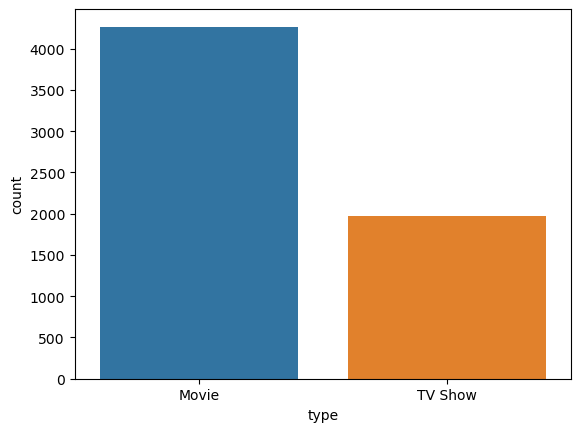

In [182]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=netflix)
plt.show()


([<matplotlib.patches.Wedge at 0x20626a7ead0>,
 [Text(-0.21768969062986285, -0.14216609509118058, 'Movie'),
  Text(0.2176897039404124, 0.14216607470960008, 'TV Show')],
 [Text(-0.4270067008508848, -0.27886426344808496, '68.4%'),
  Text(0.4270067269600397, 0.2788642234688309, '31.6%')])

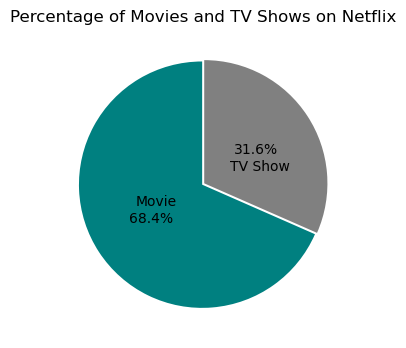

In [183]:
import matplotlib.pyplot as plt

# Pie chart of the type of Netflix shows
fig = plt.figure(figsize= (4,4))
plt.title('Percentage of Movies and TV Shows on Netflix')
plt.pie(netflix['type'].value_counts(), explode = (0.01,0.01), autopct = '%.1f%%', startangle=90, 
        pctdistance = 0.5, colors = ['teal', 'grey'], 
        labels = netflix['type'].value_counts().index, labeldistance = 0.25)

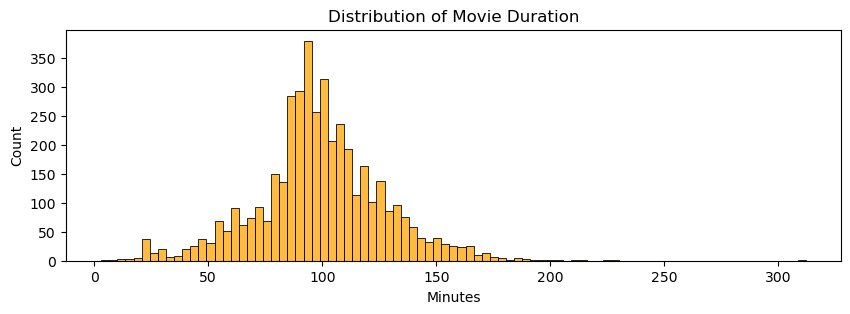

In [184]:
import seaborn as sns

# Graph of Duration in minutes of the Movies in Netflix
fig = plt.figure(figsize= (10,3)) 
sns.histplot(netflix[netflix['type']== 'Movie']['duration_minutes'], color = 'orange')
plt.title('Distribution of Movie Duration')
plt.xlabel('Minutes')
plt.show()

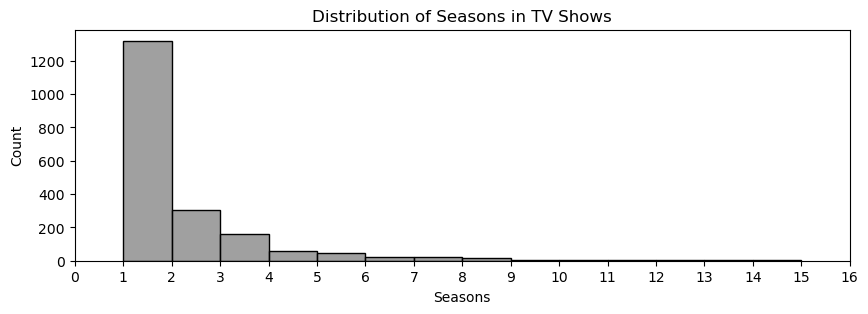

In [185]:
import numpy as np
# Graph of Duration in seasons of the TV Shows on Netflix
fig = plt.figure(figsize= (10,3)) 
sns.histplot(netflix[netflix['type']== 'TV Show']['duration_seasons'], color = 'grey', binwidth = 1)
plt.title('Distribution of Seasons in TV Shows')
plt.xticks(np.arange(0, 17))
plt.xlabel('Seasons')
plt.show()

In [186]:
# Total movies and shows added each year
year = netflix['date_added'].value_counts().to_frame().reset_index().rename(
    columns={'index':'date', 'date_added':'count'})

year['year'] = [i.year for i in year['date']] # extract year from date

# 1678 is a place holder year and 2020 only has January data, so remove them
years_to_remove = [1678, 2020] 
year_filtered = year[~year['year'].isin(years_to_remove)]
year_count = year_filtered.groupby('year')['count'].sum().to_frame().reset_index()

In [187]:
# Movies added each year
year_movie = netflix[netflix['type']=='Movie']['date_added'].value_counts().to_frame().reset_index().rename(
    columns={'index':'date', 'date_added':'count'})

year_movie['year'] = [i.year for i in year_movie['date']] # extrac year from date
years_to_remove = [1678, 2020] # 1678 is a place holder year and 2020 only has January data
year_movie_filtered = year_movie[~year_movie['year'].isin(years_to_remove)]
year_movie_count = year_movie_filtered.groupby('year')['count'].sum().to_frame().reset_index()

In [188]:
# Movies added each year
year_show = netflix[netflix['type']=='TV Show']['date_added'].value_counts().to_frame().reset_index().rename(
    columns={'index':'date', 'date_added':'count'})

year_show['year'] = [i.year for i in year_show['date']] # extrac year from date
years_to_remove = [1678, 2020] # 1678 is a place holder year and 2020 only has January data
year_show_filtered = year_show[~year_show['year'].isin(years_to_remove)]
year_show_count = year_show_filtered.groupby('year')['count'].sum().to_frame().reset_index()

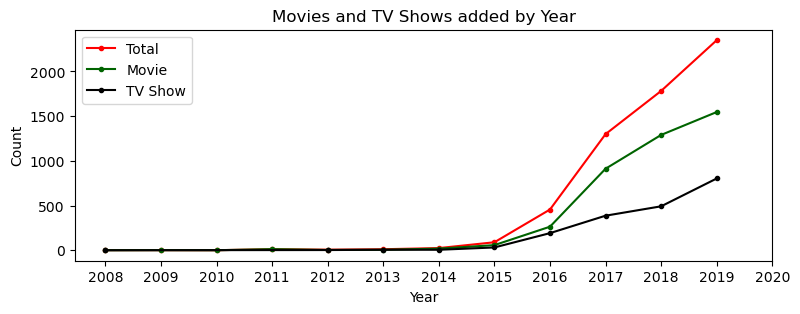

In [189]:
fig = plt.figure(figsize= (9,3)) 
plt.plot(year_count['year'], year_count['count'], marker = '.', label = 'Total', color ='red')
plt.plot(year_movie_count['year'], year_movie_count['count'], marker = '.', label = 'Movie', color = 'darkgreen')
plt.plot(year_show_count['year'], year_show_count['count'], marker = '.', label = 'TV Show', color = 'black')
plt.title('Movies and TV Shows added by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(range(2008,2021))
plt.legend()
plt.show()

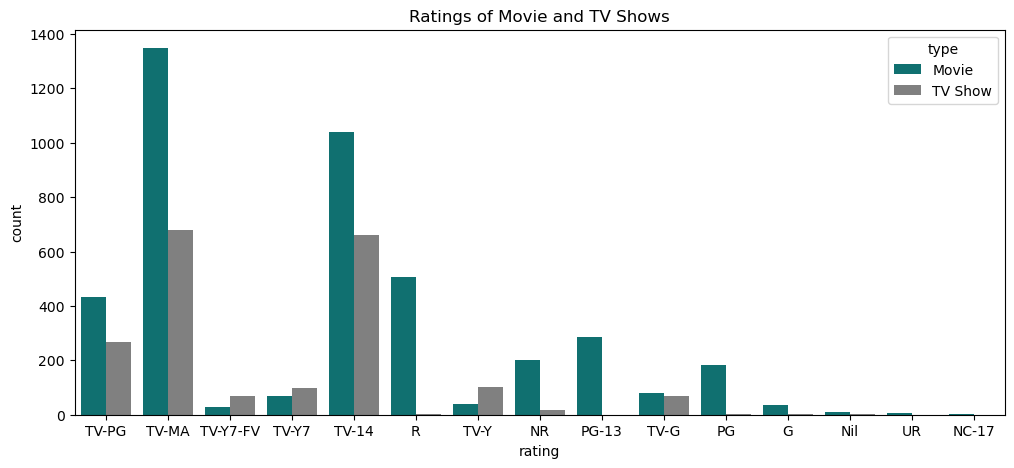

In [190]:
# Visualization of Ratings by type
fig = plt.figure(figsize= (12,5)) 
sns.countplot(data = netflix, x = 'rating', hue = 'type', palette = ['teal','grey'])
plt.title('Ratings of Movie and TV Shows')
plt.show()

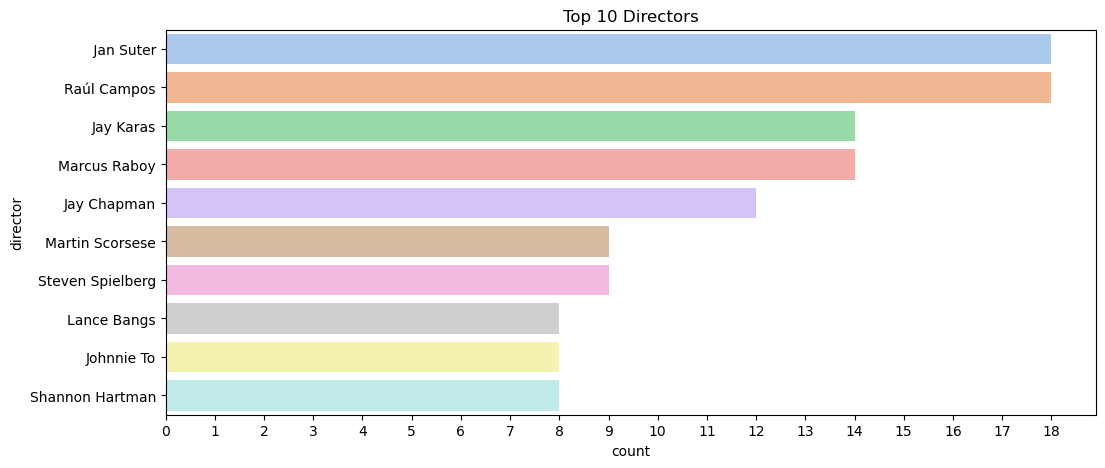

In [191]:
# Top 10 directors 
fig = plt.figure(figsize= (12,5)) 
director_list = netflix[netflix['director'] != 'Nil']['director'].str.split(',').explode()
sns.countplot(y = director_list, order=director_list.value_counts().index[:10], palette='pastel')
plt.title('Top 10 Directors', fontsize =12)
plt.xticks(np.arange(0, 19))
plt.show()

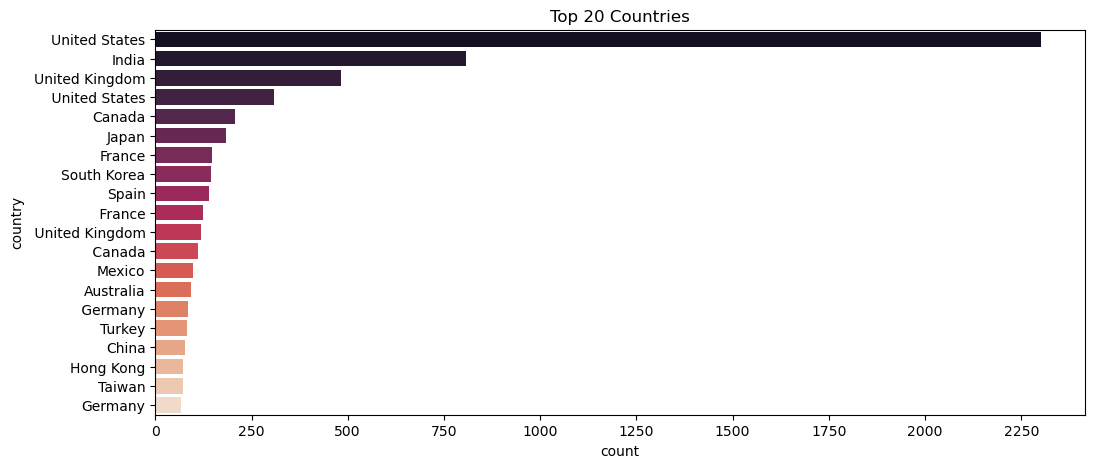

In [192]:
# Top 20 countries
fig = plt.figure(figsize= (12,5)) 
country_list = netflix[netflix['country'] != 'Nil']['country'].str.split(',').explode()
sns.countplot(y = country_list, order=country_list.value_counts().index[:20], palette='rocket')
plt.title('Top 20 Countries', fontsize =12)
plt.xticks(np.arange(0, 2500, 250))
plt.show()

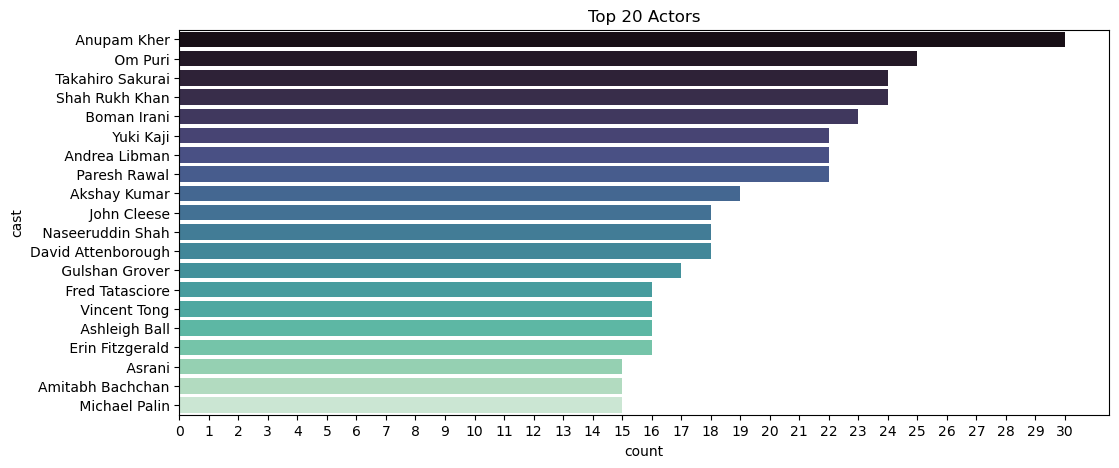

In [193]:
# Top 20 cast
fig = plt.figure(figsize= (12,5)) 
cast_list = netflix[netflix['cast'] != 'Nil']['cast'].str.split(',').explode()
sns.countplot(y = cast_list, order=cast_list.value_counts().index[:20], palette='mako')
plt.title('Top 20 Actors', fontsize =12)
plt.xticks(np.arange(0, 31))
plt.show()

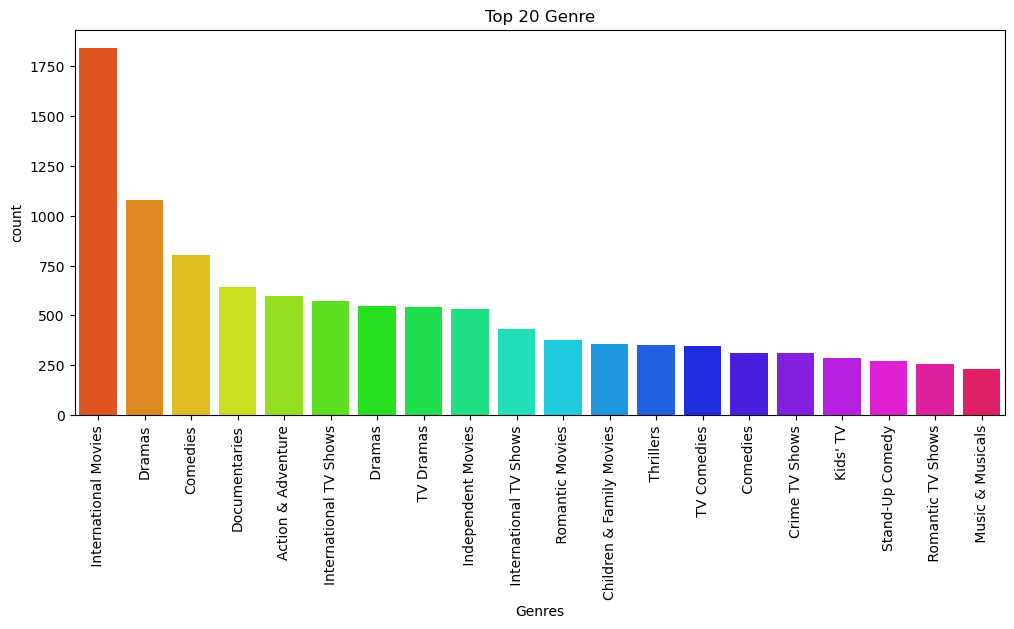

In [194]:
# Top 20 genres
fig = plt.figure(figsize= (12,5)) 
genre_list = netflix[netflix['listed_in'] != 'Nil']['listed_in'].str.split(',').explode()
sns.countplot(x = genre_list, order=genre_list.value_counts().index[:20], palette='hsv')
plt.title('Top 20 Genre', fontsize =12)
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.show()

In [195]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [196]:

col_convert = ['description','director','country', 'cast', 'listed_in']

netflix_text = netflix.copy() # make a copy of netflix dataframe to work on text preprocessing
netflix_text[col_convert] = netflix[col_convert].astype(str)

netflix_text['details'] = netflix['description'] + ' ' + netflix['director'] + ' ' + netflix['country'] + ' ' + netflix['cast'] + ' ' + netflix['listed_in']
netflix_text.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,details
0,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,Before planning an awesome wedding for his gra...,81145628,"Richard Finn, Tim Maltby","United States, China, India, South Korea","Alan Marriott, Jennifer Cameron, Lee Tockar, J...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,94,0,Movie,Jandino: Whatever it Takes,2016-09-09,2016,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401,Nil,United Kingdom,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,0,1,TV Show,Transformers Prime,2018-09-08,2013,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439,Nil,United States,"Peter Cullen, Kevin Michael Richardson, Josh K...",Kids' TV,"With the help of three human allies, the Autob..."
3,0,1,TV Show,Transformers: Robots in Disguise,2018-09-08,2016,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654,Nil,United States,"Will Friedle, Mitchell Whitfield, Ted McGinley...",Kids' TV,When a prison ship crash unleashes hundreds of...
4,99,0,Movie,#realityhigh,2017-09-08,2017,TV-14,When nerdy high schooler Dani finally attracts...,80125979,Fernando Lebrija,United States,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel...",Comedies,When nerdy high schooler Dani finally attracts...


## Converting all the text into their lower case & removing stopwords

In [238]:
columns_to_lower = ['title' , 'description', 'director', 'country', 'cast', 'listed_in']

netflix_text[columns_to_lower] = netflix_text[columns_to_lower].apply(lambda x: x.str.lower())

In [239]:
netflix_text


,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,details,clustering_attributes,kmeans_cluster
0,90,0,Movie,norm of the north: king sized adventure,2019-09-09,2019,TV-PG,planning awesome wedding grandfather polar bea...,81145628,richard finn tim maltby,united states china india south korea,alan marriott jennifer cameron lee tockar jona...,children family movies comedies,Before planning an awesome wedding for his gra...,"[richard, finn, tim, maltby, alan, marriott, j...",1
1,94,0,Movie,jandino: whatever it takes,2016-09-09,2016,TV-MA,jandino asporaat riffs challenges raising kids...,80117401,nil,united kingdom,jandino asporaat,standup comedy,Jandino Asporaat riffs on the challenges of ra...,"[nil, jandino, asporaat, united, kingdom, stan...",2
2,0,1,TV Show,transformers prime,2018-09-08,2013,TV-Y7-FV,help three human allies autobots protect earth...,70234439,nil,united states,peter cullen kevin michael richardson josh kea...,kids tv,"With the help of three human allies, the Autob...","[nil, peter, cullen, kevin, michael, richardso...",4
3,0,1,TV Show,transformers: robots in disguise,2018-09-08,2016,TV-Y7,prison ship crash unleashes hundreds deceptico...,80058654,nil,united states,friedle mitchell whitfield ted mcginley stuart...,kids tv,When a prison ship crash unleashes hundreds of...,"[nil, friedle, mitchell, whitfield, ted, mcgin...",4
4,99,0,Movie,#realityhigh,2017-09-08,2017,TV-14,nerdy high schooler dani finally attracts inte...,80125979,fernando lebrija,united states,nesta cooper alicia sanz kid ink jake borelli ...,comedies,When nerdy high schooler Dani finally attracts...,"[fernando, lebrija, nesta, cooper, alicia, san...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,0,13,TV Show,red vs. blue,1678-01-01,2015,NR,parody firstperson shooter games military life...,80000063,nil,united states,burnie burns joel heyman dan godwin matt hullu...,tv action adventure tv comedies tv scifi fantasy,"This parody of first-person shooter games, mil...","[nil, burnie, burns, joel, heyman, dan, godwin...",4
6232,0,4,TV Show,maron,1678-01-01,2016,TV-MA,marc maron stars marc maron interviews fellow ...,70286564,nil,united states,marc maron andy kindler judd hirsch josh brene...,tv comedies,"Marc Maron stars as Marc Maron, who interviews...","[nil, marc, maron, andy, kindler, judd, hirsch...",4
6233,60,0,Movie,little baby bum: nursery rhyme friends,1678-01-01,2016,Nil,nursery rhymes original music children accompa...,80116008,nil,nil,nil,movies,Nursery rhymes and original music for children...,"[nil, nil, nil, movies, nursery, rhymes, origi...",6
6234,0,2,TV Show,a young doctor's notebook and other stories,1678-01-01,2013,TV-MA,set russian revolution comic miniseries based ...,70281022,nil,united kingdom,daniel radcliffe rosie cavaliero margaret clun...,british tv shows tv comedies tv dramas,"Set during the Russian Revolution, this comic ...","[nil, daniel, radcliffe, rosie, cavaliero, mar...",3


In [240]:
import pandas as pd
import string


netflix_text[['description', 'director', 'country', 'cast', 'listed_in']] = netflix_text[['description', 'director', 'country', 'cast', 'listed_in']].apply(lambda x: x.str.replace('[{}]'.format(string.punctuation), ''))


C:\Users\patta\AppData\Local\Temp\ipykernel_16276\1704684887.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  netflix_text[['description', 'director', 'country', 'cast', 'listed_in']] = netflix_text[['description', 'director', 'country', 'cast', 'listed_in']].apply(lambda x: x.str.replace('[{}]'.format(string.punctuation), ''))


In [241]:
netflix_text.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,details,clustering_attributes,kmeans_cluster
0,90,0,Movie,norm of the north: king sized adventure,2019-09-09,2019,TV-PG,planning awesome wedding grandfather polar bea...,81145628,richard finn tim maltby,united states china india south korea,alan marriott jennifer cameron lee tockar jona...,children family movies comedies,Before planning an awesome wedding for his gra...,"[richard, finn, tim, maltby, alan, marriott, j...",1
1,94,0,Movie,jandino: whatever it takes,2016-09-09,2016,TV-MA,jandino asporaat riffs challenges raising kids...,80117401,nil,united kingdom,jandino asporaat,standup comedy,Jandino Asporaat riffs on the challenges of ra...,"[nil, jandino, asporaat, united, kingdom, stan...",2
2,0,1,TV Show,transformers prime,2018-09-08,2013,TV-Y7-FV,help three human allies autobots protect earth...,70234439,nil,united states,peter cullen kevin michael richardson josh kea...,kids tv,"With the help of three human allies, the Autob...","[nil, peter, cullen, kevin, michael, richardso...",4
3,0,1,TV Show,transformers: robots in disguise,2018-09-08,2016,TV-Y7,prison ship crash unleashes hundreds deceptico...,80058654,nil,united states,friedle mitchell whitfield ted mcginley stuart...,kids tv,When a prison ship crash unleashes hundreds of...,"[nil, friedle, mitchell, whitfield, ted, mcgin...",4
4,99,0,Movie,#realityhigh,2017-09-08,2017,TV-14,nerdy high schooler dani finally attracts inte...,80125979,fernando lebrija,united states,nesta cooper alicia sanz kid ink jake borelli ...,comedies,When nerdy high schooler Dani finally attracts...,"[fernando, lebrija, nesta, cooper, alicia, san...",1


In [201]:
netflix_text.description[:10]


0    before planning an awesome wedding for his gra...
1    jandino asporaat riffs on the challenges of ra...
2    with the help of three human allies the autobo...
3    when a prison ship crash unleashes hundreds of...
4    when nerdy high schooler dani finally attracts...
5    a young journalist is forced into a life of cr...
6    in a dystopian future an insurance adjuster fo...
7    fabrizio copano takes audience participation t...
8    as californias 2016 fire season rages brave ba...
9    a struggling couple cant believe their luck wh...
Name: description, dtype: object

In [202]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

columns_to_remove_stopwords = ['description', 'director', 'country', 'cast', 'listed_in']

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply the remove_stopwords function to the specified columns
netflix_text[columns_to_remove_stopwords] = netflix_text[columns_to_remove_stopwords].applymap(remove_stopwords)



In [204]:
netflix_text.description[0:10]  ## we can see there are no stopwords in the text

0    planning awesome wedding grandfather polar bea...
1    jandino asporaat riffs challenges raising kids...
2    help three human allies autobots protect earth...
3    prison ship crash unleashes hundreds deceptico...
4    nerdy high schooler dani finally attracts inte...
5    young journalist forced life crime save father...
6    dystopian future insurance adjuster tech compa...
7    fabrizio copano takes audience participation n...
8    californias 2016 fire season rages brave backc...
9    struggling couple cant believe luck find stash...
Name: description, dtype: object

In [205]:
netflix_text['clustering_attributes'] = (netflix_text['director'] + ' ' + 
                                netflix_text['cast'] +' ' + 
                                netflix_text['country'] +' ' + 
                                netflix_text['listed_in'] +' ' + 
                                netflix_text['description'])

## Lemmatization

In [206]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [207]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')  

lemmatizer = WordNetLemmatizer()
netflix_text['clustering_attributes'] = lemmatize_verbs(netflix_text['clustering_attributes'])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [208]:
netflix_text['clustering_attributes'][40]

'tom gianas ross r shuman nick swardson rob riggle danny mcbride susan sarandon maria bamford mila kunis bob odenkirk tj miller jennifer coolidge john farley united states action adventure comedies independent movies best friends break blood oath one cast away hell two must save misfits underworld'

### We have lematized the corpus.

## Tokenization

In [209]:
from nltk.tokenize import TweetTokenizer

# Create a TweetTokenizer object
tweet_tokenizer = TweetTokenizer()
tokenizer = TweetTokenizer()

In [210]:
netflix_text['clustering_attributes'] = netflix_text['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [211]:
netflix_text.clustering_attributes[0:10]

0    [richard, finn, tim, maltby, alan, marriott, j...
1    [nil, jandino, asporaat, united, kingdom, stan...
2    [nil, peter, cullen, kevin, michael, richardso...
3    [nil, friedle, mitchell, whitfield, ted, mcgin...
4    [fernando, lebrija, nesta, cooper, alicia, san...
5    [nil, alberto, ammann, claudia, traisac, eloy,...
6    [gabe, ibáñez, antonio, banderas, robert, fors...
7    [rodrigo, toro, francisco, schultz, fabrizio, ...
8    [nil, nil, united, states, docuseries, science...
9    [henrik, ruben, genz, james, franco, sam, spru...
Name: clustering_attributes, dtype: object

### We have tokenized the corpus.

## Vectorization.

In [212]:
clustering_data = netflix_text['clustering_attributes']

In [213]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

<IPython.core.display.Javascript object>

C:\Users\patta\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\patta\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


In [214]:
X.shape

(6234, 20000)

In [215]:
type(X)

scipy.sparse._csr.csr_matrix

In [216]:
# convert X into array form for clustering
X = X.toarray()


In [217]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Dimensionality reduction using PCA:

In [218]:
from sklearn.decomposition import PCA

In [219]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

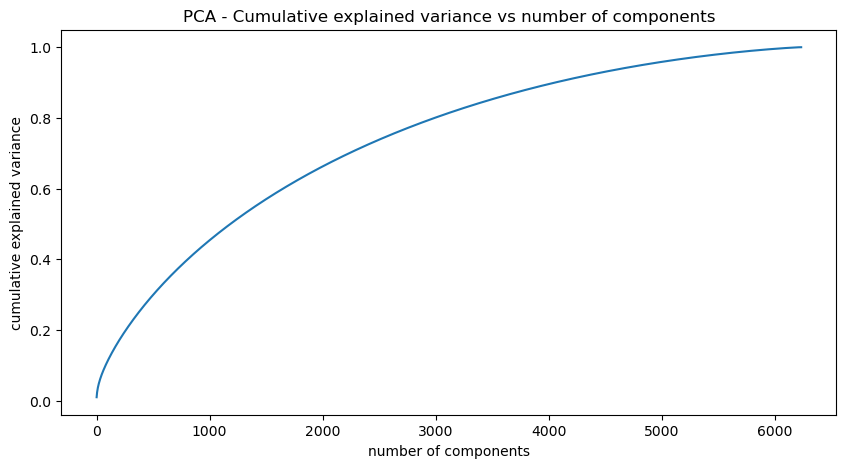

In [220]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### - We can see that around 6500 components are explaining 100% of variance.
### - Also, more than 80% of the variance is explained just by 4000 components.
### - So, to simplify our model we can reduce our dimension by taking 4000 components, by which we can capture more than 80% of variance.

In [221]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [222]:
# transformed features
x_pca = pca.transform(X)

In [223]:
x_pca.shape

(6234, 4000)

#### We have successfully reduced the features to 4000.

# Clustering:

## 1. K_Means Clustering.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'WCSS')

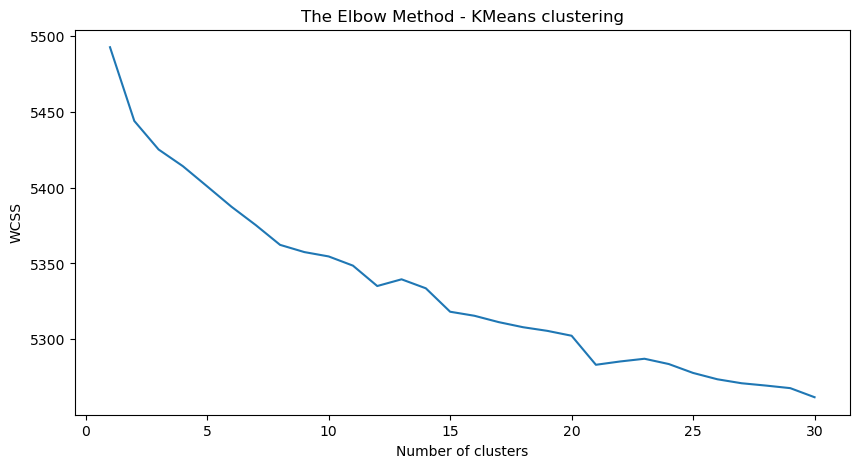

In [224]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=64)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

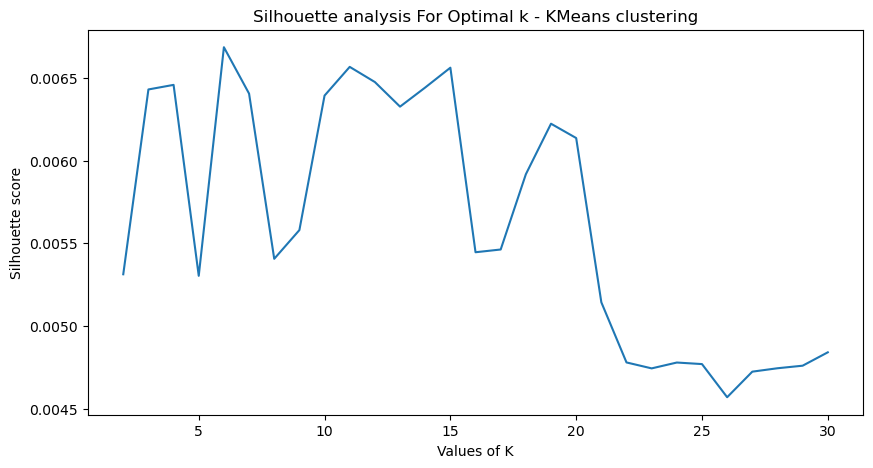

In [225]:
# Plotting Silhouette score for different umber of clusters
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

### We can see that silhoutte score is highest at around 6 or 7.
### So we can take 7 as the number of clusters.

In [226]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=7,init='k-means++',random_state=33)
kmeans.fit(x_pca)

<IPython.core.display.Javascript object>

KMeans(n_clusters=7, random_state=33)

In [227]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(5374.571832495737, 0.006404805441269709)


In [228]:
# Adding a kmeans cluster number attribute
netflix_text['kmeans_cluster'] = kmeans.labels_

In [229]:
netflix_text

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,details,clustering_attributes,kmeans_cluster
0,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,planning awesome wedding grandfather polar bea...,81145628,richard finn tim maltby,united states china india south korea,alan marriott jennifer cameron lee tockar jona...,children family movies comedies,Before planning an awesome wedding for his gra...,"[richard, finn, tim, maltby, alan, marriott, j...",1
1,94,0,Movie,Jandino: Whatever it Takes,2016-09-09,2016,TV-MA,jandino asporaat riffs challenges raising kids...,80117401,nil,united kingdom,jandino asporaat,standup comedy,Jandino Asporaat riffs on the challenges of ra...,"[nil, jandino, asporaat, united, kingdom, stan...",2
2,0,1,TV Show,Transformers Prime,2018-09-08,2013,TV-Y7-FV,help three human allies autobots protect earth...,70234439,nil,united states,peter cullen kevin michael richardson josh kea...,kids tv,"With the help of three human allies, the Autob...","[nil, peter, cullen, kevin, michael, richardso...",4
3,0,1,TV Show,Transformers: Robots in Disguise,2018-09-08,2016,TV-Y7,prison ship crash unleashes hundreds deceptico...,80058654,nil,united states,friedle mitchell whitfield ted mcginley stuart...,kids tv,When a prison ship crash unleashes hundreds of...,"[nil, friedle, mitchell, whitfield, ted, mcgin...",4
4,99,0,Movie,#realityhigh,2017-09-08,2017,TV-14,nerdy high schooler dani finally attracts inte...,80125979,fernando lebrija,united states,nesta cooper alicia sanz kid ink jake borelli ...,comedies,When nerdy high schooler Dani finally attracts...,"[fernando, lebrija, nesta, cooper, alicia, san...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,0,13,TV Show,Red vs. Blue,1678-01-01,2015,NR,parody firstperson shooter games military life...,80000063,nil,united states,burnie burns joel heyman dan godwin matt hullu...,tv action adventure tv comedies tv scifi fantasy,"This parody of first-person shooter games, mil...","[nil, burnie, burns, joel, heyman, dan, godwin...",4
6232,0,4,TV Show,Maron,1678-01-01,2016,TV-MA,marc maron stars marc maron interviews fellow ...,70286564,nil,united states,marc maron andy kindler judd hirsch josh brene...,tv comedies,"Marc Maron stars as Marc Maron, who interviews...","[nil, marc, maron, andy, kindler, judd, hirsch...",4
6233,60,0,Movie,Little Baby Bum: Nursery Rhyme Friends,1678-01-01,2016,Nil,nursery rhymes original music children accompa...,80116008,nil,nil,nil,movies,Nursery rhymes and original music for children...,"[nil, nil, nil, movies, nursery, rhymes, origi...",6
6234,0,2,TV Show,A Young Doctor's Notebook and Other Stories,1678-01-01,2013,TV-MA,set russian revolution comic miniseries based ...,70281022,nil,united kingdom,daniel radcliffe rosie cavaliero margaret clun...,british tv shows tv comedies tv dramas,"Set during the Russian Revolution, this comic ...","[nil, daniel, radcliffe, rosie, cavaliero, mar...",3


### So we added a column where the clusters are mentioned to their respective observation.

In [230]:
data = netflix_text[(netflix_text.kmeans_cluster==1)]
data.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,details,clustering_attributes,kmeans_cluster
0,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,planning awesome wedding grandfather polar bea...,81145628,richard finn tim maltby,united states china india south korea,alan marriott jennifer cameron lee tockar jona...,children family movies comedies,Before planning an awesome wedding for his gra...,"[richard, finn, tim, maltby, alan, marriott, j...",1
4,99,0,Movie,#realityhigh,2017-09-08,2017,TV-14,nerdy high schooler dani finally attracts inte...,80125979,fernando lebrija,united states,nesta cooper alicia sanz kid ink jake borelli ...,comedies,When nerdy high schooler Dani finally attracts...,"[fernando, lebrija, nesta, cooper, alicia, san...",1
6,110,0,Movie,Automata,2017-09-08,2014,R,dystopian future insurance adjuster tech compa...,70304989,gabe ibáñez,bulgaria canada united states spain,antonio banderas robert forster tim mcinnerny ...,international movies scifi fantasy thrillers,"In a dystopian future, an insurance adjuster f...","[gabe, ibáñez, antonio, banderas, robert, fors...",1
9,90,0,Movie,Good People,2017-09-08,2014,R,struggling couple cant believe luck find stash...,70304990,henrik ruben genz,united states sweden united kingdom denmark,james franco sam spruell thomas arnold anna fr...,action adventure thrillers,A struggling couple can't believe their luck w...,"[henrik, ruben, genz, james, franco, sam, spru...",1
11,95,0,Movie,Kidnapping Mr. Heineken,2017-09-08,2015,R,beer magnate alfred freddy heineken kidnapped ...,70299204,daniel alfredson,netherlands united states belgium united kingdom,jim sturgess mark van eeuwen jemima west thoma...,action adventure dramas international movies,"When beer magnate Alfred ""Freddy"" Heineken is ...","[daniel, alfredson, jim, sturgess, mark, van, ...",1


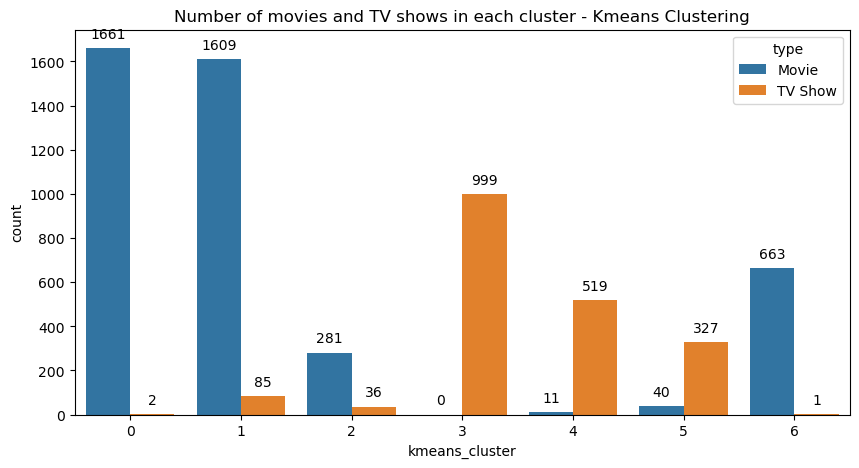

In [231]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=netflix_text, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [232]:
!pip install wordcloud


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [233]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in netflix_text[netflix_text['kmeans_cluster'] == cluster_num].description.values:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(width=700, height=700,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)




In [234]:
from nltk.corpus import stopwords

# Download stopwords 
import nltk
nltk.download('stopwords')

STOPWORDS = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


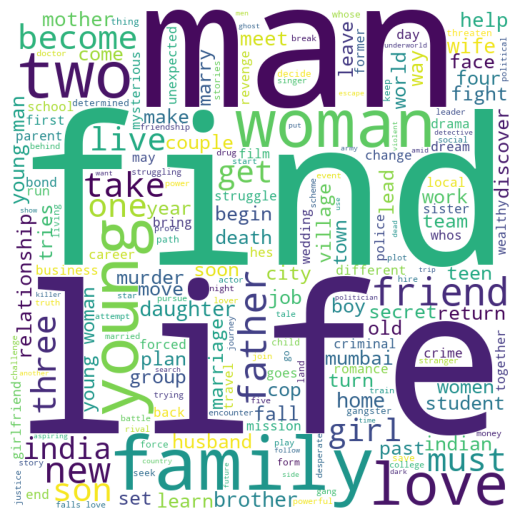

In [243]:
# Wordcloud for cluster 0
from wordcloud import WordCloud

kmeans_worldcloud(0)

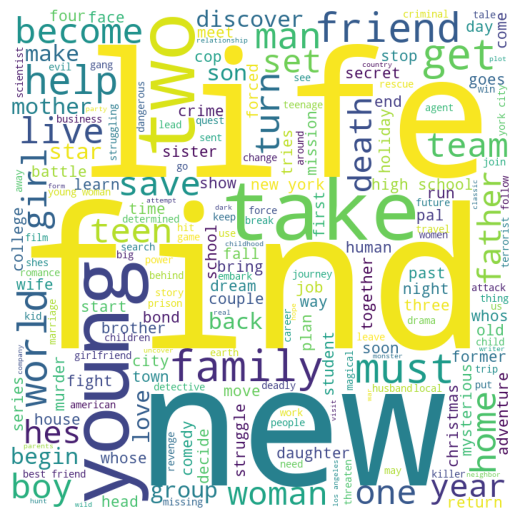

In [244]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

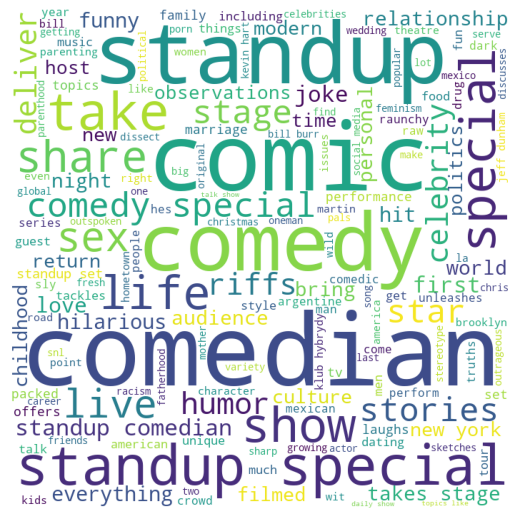

In [245]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

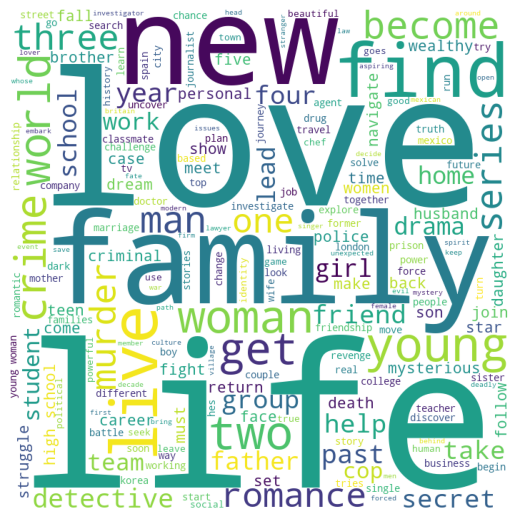

In [246]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

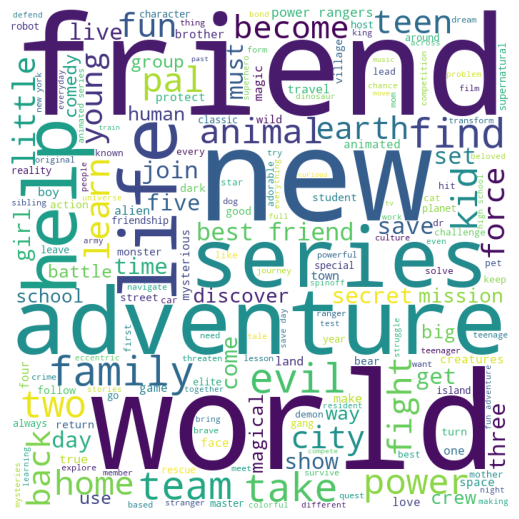

In [247]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

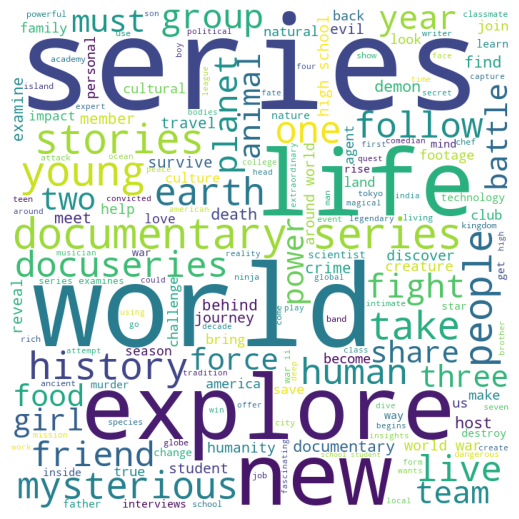

In [248]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

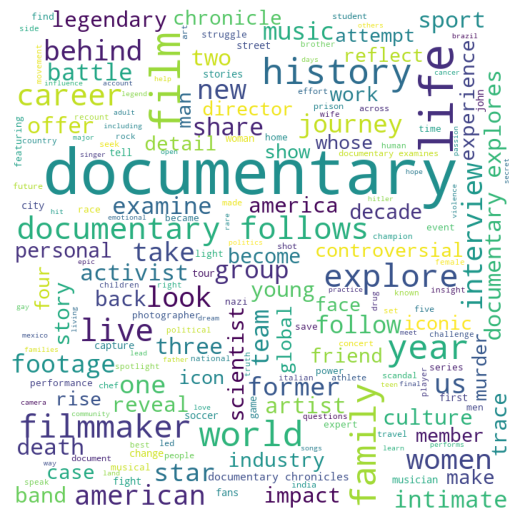

In [249]:
# Wordcloud for cluster 6
kmeans_worldcloud(6)

## Hierarchical clustering.

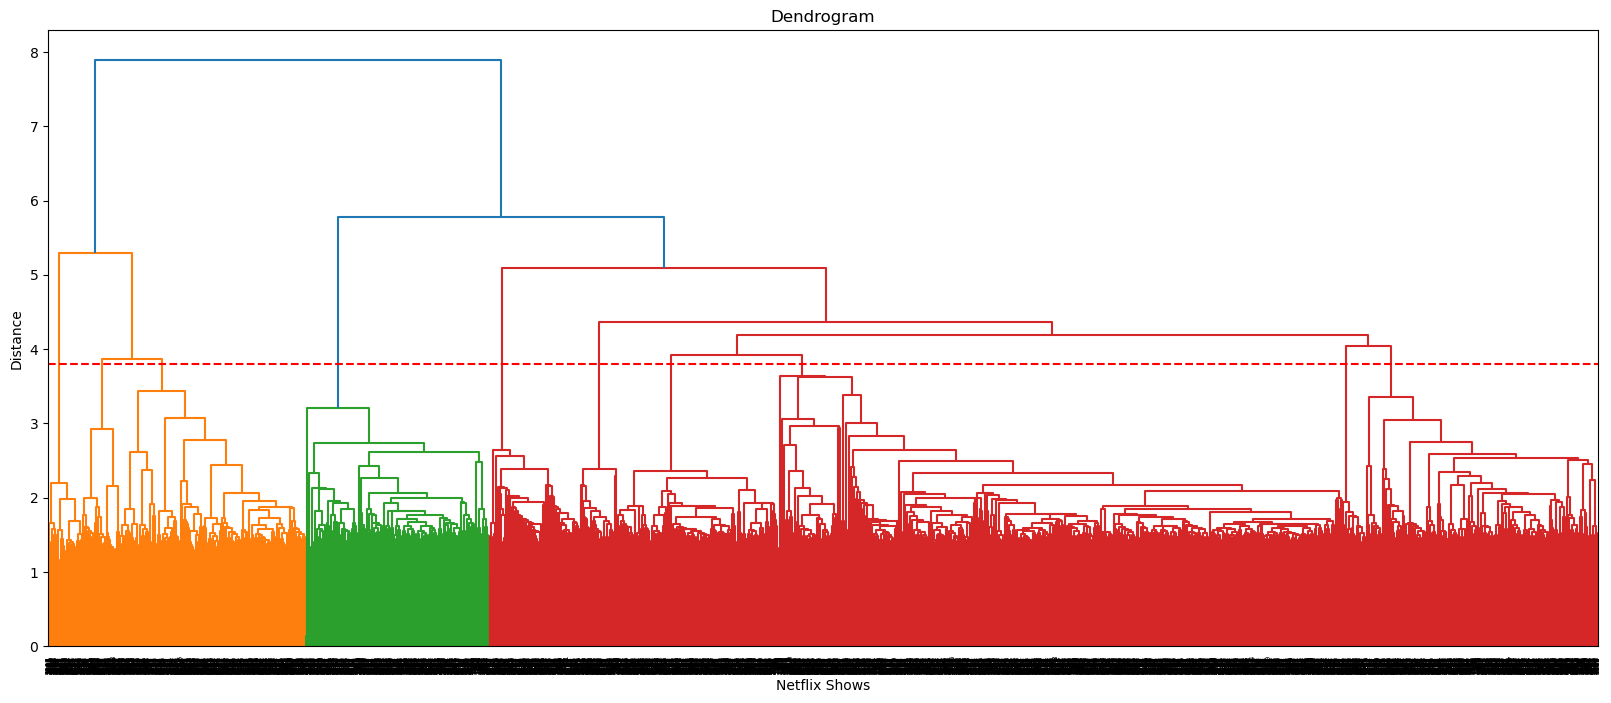

In [250]:
# Building a dendogram to decide on the number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,8))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [251]:
!pip install --upgrade scikit-learn


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [256]:
# Fitting hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=7, linkage='ward')  # Adjust linkage as needed
labels = hierarchical.fit_predict(x_pca)


In [257]:
# Adding a kmeans cluster number attribute
netflix_text['hierarchical_cluster'] = labels

In [258]:
netflix_text.head()


,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,details,clustering_attributes,kmeans_cluster,hierarchical_cluster
0,90,0,Movie,norm of the north: king sized adventure,2019-09-09,2019,TV-PG,planning awesome wedding grandfather polar bea...,81145628,richard finn tim maltby,united states china india south korea,alan marriott jennifer cameron lee tockar jona...,children family movies comedies,Before planning an awesome wedding for his gra...,"[richard, finn, tim, maltby, alan, marriott, j...",1,2
1,94,0,Movie,jandino: whatever it takes,2016-09-09,2016,TV-MA,jandino asporaat riffs challenges raising kids...,80117401,nil,united kingdom,jandino asporaat,standup comedy,Jandino Asporaat riffs on the challenges of ra...,"[nil, jandino, asporaat, united, kingdom, stan...",2,4
2,0,1,TV Show,transformers prime,2018-09-08,2013,TV-Y7-FV,help three human allies autobots protect earth...,70234439,nil,united states,peter cullen kevin michael richardson josh kea...,kids tv,"With the help of three human allies, the Autob...","[nil, peter, cullen, kevin, michael, richardso...",4,2
3,0,1,TV Show,transformers: robots in disguise,2018-09-08,2016,TV-Y7,prison ship crash unleashes hundreds deceptico...,80058654,nil,united states,friedle mitchell whitfield ted mcginley stuart...,kids tv,When a prison ship crash unleashes hundreds of...,"[nil, friedle, mitchell, whitfield, ted, mcgin...",4,2
4,99,0,Movie,#realityhigh,2017-09-08,2017,TV-14,nerdy high schooler dani finally attracts inte...,80125979,fernando lebrija,united states,nesta cooper alicia sanz kid ink jake borelli ...,comedies,When nerdy high schooler Dani finally attracts...,"[fernando, lebrija, nesta, cooper, alicia, san...",1,2


In [259]:
data1 = netflix_text[(netflix_text.hierarchical_cluster==7)]
data1.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,details,clustering_attributes,kmeans_cluster,hierarchical_cluster


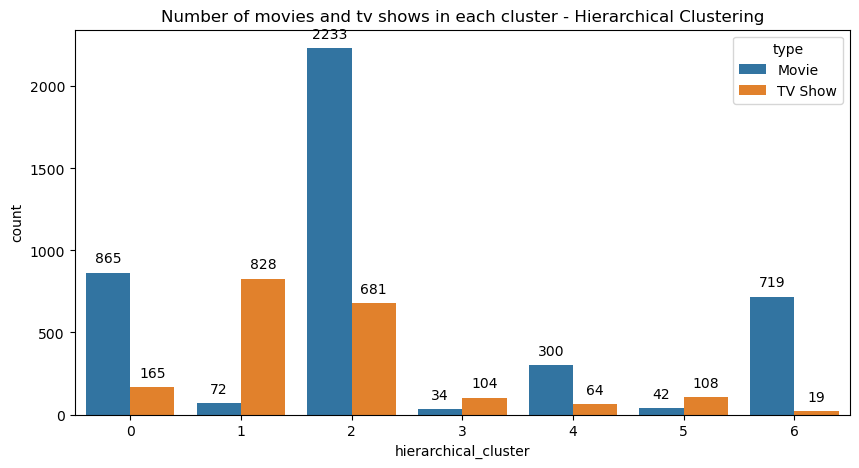

In [260]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=netflix_text, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [261]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in netflix_text[netflix_text['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

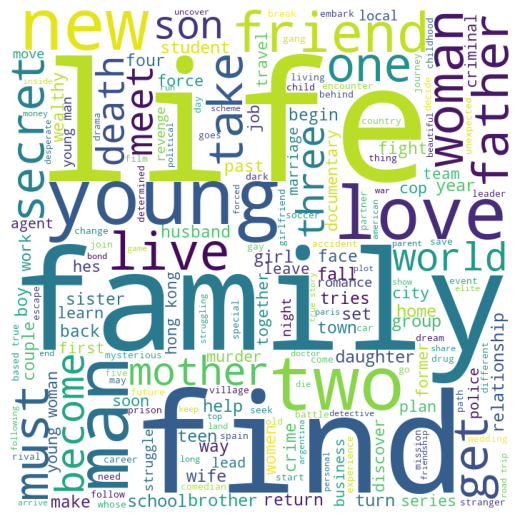

In [262]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

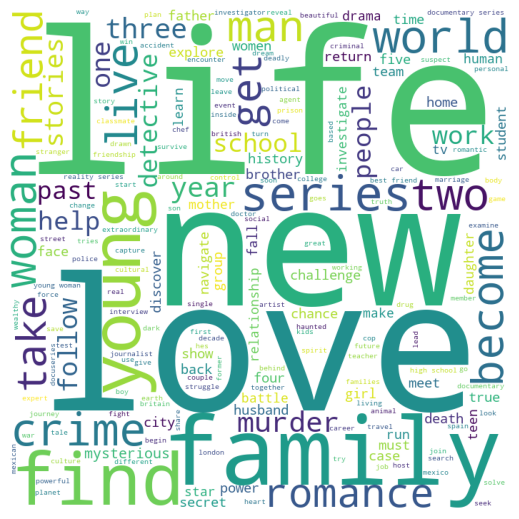

In [263]:
# Wordcloud for cluster 0
hierarchical_worldcloud(1)

# Content based recommender system:

In [264]:
# defining a new df for building a recommender system
recommender_df = netflix_text.copy()

In [265]:
recommender_df

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,details,clustering_attributes,kmeans_cluster,hierarchical_cluster
0,90,0,Movie,norm of the north: king sized adventure,2019-09-09,2019,TV-PG,planning awesome wedding grandfather polar bea...,81145628,richard finn tim maltby,united states china india south korea,alan marriott jennifer cameron lee tockar jona...,children family movies comedies,Before planning an awesome wedding for his gra...,"[richard, finn, tim, maltby, alan, marriott, j...",1,2
1,94,0,Movie,jandino: whatever it takes,2016-09-09,2016,TV-MA,jandino asporaat riffs challenges raising kids...,80117401,nil,united kingdom,jandino asporaat,standup comedy,Jandino Asporaat riffs on the challenges of ra...,"[nil, jandino, asporaat, united, kingdom, stan...",2,4
2,0,1,TV Show,transformers prime,2018-09-08,2013,TV-Y7-FV,help three human allies autobots protect earth...,70234439,nil,united states,peter cullen kevin michael richardson josh kea...,kids tv,"With the help of three human allies, the Autob...","[nil, peter, cullen, kevin, michael, richardso...",4,2
3,0,1,TV Show,transformers: robots in disguise,2018-09-08,2016,TV-Y7,prison ship crash unleashes hundreds deceptico...,80058654,nil,united states,friedle mitchell whitfield ted mcginley stuart...,kids tv,When a prison ship crash unleashes hundreds of...,"[nil, friedle, mitchell, whitfield, ted, mcgin...",4,2
4,99,0,Movie,#realityhigh,2017-09-08,2017,TV-14,nerdy high schooler dani finally attracts inte...,80125979,fernando lebrija,united states,nesta cooper alicia sanz kid ink jake borelli ...,comedies,When nerdy high schooler Dani finally attracts...,"[fernando, lebrija, nesta, cooper, alicia, san...",1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,0,13,TV Show,red vs. blue,1678-01-01,2015,NR,parody firstperson shooter games military life...,80000063,nil,united states,burnie burns joel heyman dan godwin matt hullu...,tv action adventure tv comedies tv scifi fantasy,"This parody of first-person shooter games, mil...","[nil, burnie, burns, joel, heyman, dan, godwin...",4,1
6232,0,4,TV Show,maron,1678-01-01,2016,TV-MA,marc maron stars marc maron interviews fellow ...,70286564,nil,united states,marc maron andy kindler judd hirsch josh brene...,tv comedies,"Marc Maron stars as Marc Maron, who interviews...","[nil, marc, maron, andy, kindler, judd, hirsch...",4,4
6233,60,0,Movie,little baby bum: nursery rhyme friends,1678-01-01,2016,Nil,nursery rhymes original music children accompa...,80116008,nil,nil,nil,movies,Nursery rhymes and original music for children...,"[nil, nil, nil, movies, nursery, rhymes, origi...",6,2
6234,0,2,TV Show,a young doctor's notebook and other stories,1678-01-01,2013,TV-MA,set russian revolution comic miniseries based ...,70281022,nil,united kingdom,daniel radcliffe rosie cavaliero margaret clun...,british tv shows tv comedies tv dramas,"Set during the Russian Revolution, this comic ...","[nil, daniel, radcliffe, rosie, cavaliero, mar...",3,1


In [266]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [267]:
recommender_df.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,details,clustering_attributes,kmeans_cluster,hierarchical_cluster
0,90,0,Movie,norm of the north: king sized adventure,2019-09-09,2019,TV-PG,planning awesome wedding grandfather polar bea...,0,richard finn tim maltby,united states china india south korea,alan marriott jennifer cameron lee tockar jona...,children family movies comedies,Before planning an awesome wedding for his gra...,"[richard, finn, tim, maltby, alan, marriott, j...",1,2
1,94,0,Movie,jandino: whatever it takes,2016-09-09,2016,TV-MA,jandino asporaat riffs challenges raising kids...,1,nil,united kingdom,jandino asporaat,standup comedy,Jandino Asporaat riffs on the challenges of ra...,"[nil, jandino, asporaat, united, kingdom, stan...",2,4
2,0,1,TV Show,transformers prime,2018-09-08,2013,TV-Y7-FV,help three human allies autobots protect earth...,2,nil,united states,peter cullen kevin michael richardson josh kea...,kids tv,"With the help of three human allies, the Autob...","[nil, peter, cullen, kevin, michael, richardso...",4,2
3,0,1,TV Show,transformers: robots in disguise,2018-09-08,2016,TV-Y7,prison ship crash unleashes hundreds deceptico...,3,nil,united states,friedle mitchell whitfield ted mcginley stuart...,kids tv,When a prison ship crash unleashes hundreds of...,"[nil, friedle, mitchell, whitfield, ted, mcgin...",4,2
4,99,0,Movie,#realityhigh,2017-09-08,2017,TV-14,nerdy high schooler dani finally attracts inte...,4,fernando lebrija,united states,nesta cooper alicia sanz kid ink jake borelli ...,comedies,When nerdy high schooler Dani finally attracts...,"[fernando, lebrija, nesta, cooper, alicia, san...",1,2


In [268]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [269]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [270]:
recommender_df.head(3)

,duration_minutes,duration_seasons,type,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,details,clustering_attributes,kmeans_cluster,hierarchical_cluster
title,,,,,,,,,,,,,,,,
norm of the north: king sized adventure,90,0,Movie,2019-09-09,2019,TV-PG,planning awesome wedding grandfather polar bea...,0,richard finn tim maltby,united states china india south korea,alan marriott jennifer cameron lee tockar jona...,children family movies comedies,Before planning an awesome wedding for his gra...,richard finn tim maltby alan marriott jennifer...,1,2
jandino: whatever it takes,94,0,Movie,2016-09-09,2016,TV-MA,jandino asporaat riffs challenges raising kids...,1,nil,united kingdom,jandino asporaat,standup comedy,Jandino Asporaat riffs on the challenges of ra...,nil jandino asporaat united kingdom standup co...,2,4
transformers prime,0,1,TV Show,2018-09-08,2013,TV-Y7-FV,help three human allies autobots protect earth...,2,nil,united states,peter cullen kevin michael richardson josh kea...,kids tv,"With the help of three human allies, the Autob...",nil peter cullen kevin michael richardson josh...,4,2


In [271]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

<IPython.core.display.Javascript object>

In [272]:
converted_matrix

<6234x43059 sparse matrix of type '<class 'numpy.int64'>'
	with 220228 stored elements in Compressed Sparse Row format>

### To build our recommendation system we will be applying the concept of Cosine Similarity.
#### cos(A,B) =   (a.b) / ( |a| * |b| )

In [274]:
# Cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity = cosine_similarity(converted_matrix)

In [275]:
cosine_similarity.shape

(6234, 6234)

In [306]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'We do not have this show on our platform'

In [315]:
# Recommendations for 'breaking bad'
recommend_10('breaking bad')           #action

If you liked 'breaking bad', you may also enjoy:



['better call saul',
 'have you ever fallen in love, miss jiang?',
 "marvel's the punisher",
 'get shorty',
 'mindhunter',
 'jack taylor',
 'travelers',
 'rica, famosa, latina',
 'person of interest',
 'love']

In [309]:
recommend_10('the karate kid')    #action

If you liked 'the karate kid', you may also enjoy:



['king of peking',
 'the forbidden kingdom',
 'shanghai fortress',
 'yanxi palace: princess adventures',
 'railroad tigers',
 'the breadwinner',
 'crouching tiger, hidden dragon',
 'late life: the chien-ming wang story',
 'love o2o',
 'kung fu panda: holiday']

In [319]:
recommend_10('dark')  #sci-fi crime thriller

If you liked 'dark', you may also enjoy:



['sherlock',
 'rica, famosa, latina',
 'stunt science',
 'inside the criminal mind',
 'jack taylor',
 'safe',
 'have you ever fallen in love, miss jiang?',
 'killer ratings',
 'three wives one husband',
 'terrorism close calls']

In [331]:
recommend_10('dhamaal')     #comedy

If you liked 'dhamaal', you may also enjoy:



['the great gambler',
 'emi: liya hai to chukana padega',
 'anthony kaun hai?',
 'oh darling yeh hai india',
 'mauli',
 'grand masti',
 'manoranjan',
 'deewana main deewana',
 'fakta ladh mhana',
 'tere naal love ho gaya']

In [321]:
# Now if we give a random movie or series name it will throw us Error

recommend_10('avengers')

'We do not have this show on our platform'

In [322]:
recommend_10('dead pool')

'We do not have this show on our platform'

In [351]:
recommend_10('')

'We do not have this show on our platform'